In [36]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [37]:
N=30
x=torch.randn(N,1)
y=x+torch.rand(N,1)/2

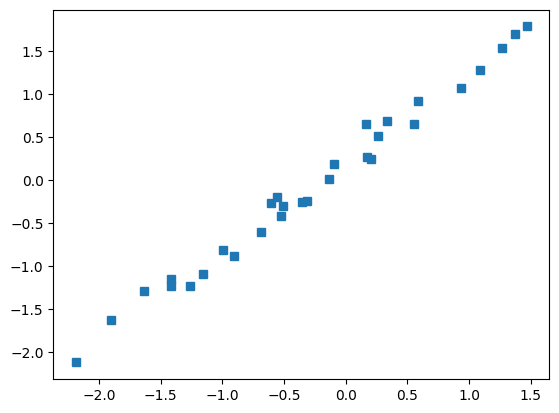

In [38]:
plt.plot(x,y,'s')
plt.show()

In [39]:
annReg=nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)
annReg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [40]:
lr=0.05
loss_fun=nn.MSELoss()
optimizer=torch.optim.SGD(annReg.parameters(),lr=lr)

In [41]:
num_epochs=500

losses=torch.zeros(num_epochs)

for epochi in range(num_epochs):
  yhat=annReg(x)

  loss=loss_fun(yhat,y)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [42]:
final_prediction=annReg(x)

In [43]:
final_loss=(final_prediction-y).pow(2).mean()
final_loss

tensor(0.0143, grad_fn=<MeanBackward0>)

In [44]:
final_accuracy=np.corrcoef(y.T,final_prediction.T.detach())[0,1]
final_accuracy

0.9929544811022508

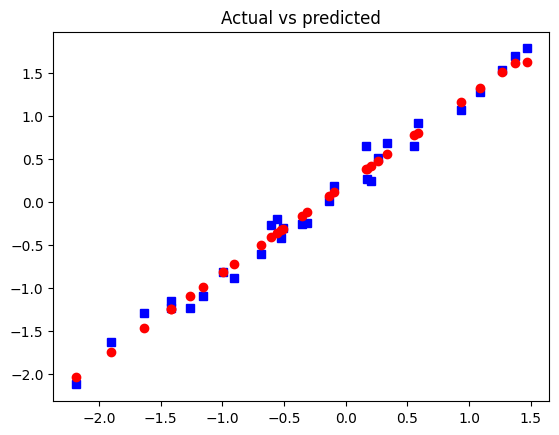

In [45]:
plt.plot(x,y,'sb')
plt.plot(x,final_prediction.detach(),'ro')
plt.title("Actual vs predicted")
plt.show()

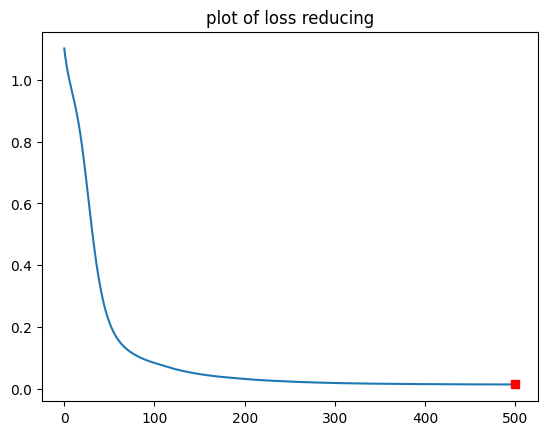

In [51]:
plt.plot(losses.detach())
plt.plot(num_epochs,final_loss.detach(),'rs')
plt.title("plot of loss reducing")
plt.show()